In [1]:
class SIFT:
    def __init__(self,sig,dir) -> None:
        self.dir = dir
        self.sig = sig
    

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np
from cv2 import subtract
import imutils

[]

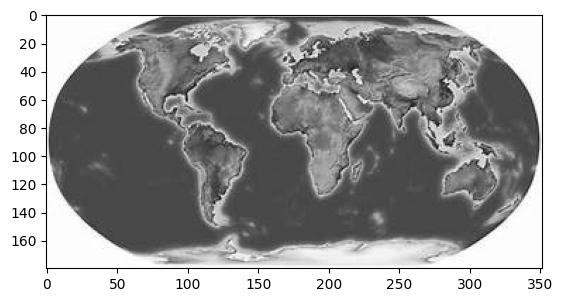

In [4]:
img = cv.imread('./img/sift')
img1 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# img1 = imutils.rotate(img1, 180)
# width = int(img1.shape[1] * 0.5)
# height = int(img1.shape[0] * 0.5)
# dsize = (width, height)
# img1 = cv.resize(img1, dsize)
# # img1=img1[:,1300:4500]
plt.imshow(img1,cmap='gray')
plt.plot()

In [6]:
R,C=img1.shape
print(R)
print(C)

180
352


In [5]:
# imgst = np.zeros((4,4,R,C))
# img_nst= np.zeros((4,4,R,C))

# def oct(img):
    
#     imgst[0,0] = img
#     # imgst[0] = 250*(imgst[0] - imgst[0].min())/(imgst[0].max() - imgst[0].min())
#     k=2
#     # print(imgst[0])

#     for i in range(4):
#         if (i!=0):
#             width = int(img.shape[1] * 0.5)
#             height = int(img.shape[0] * 0.5)
#             dsize = (width, height)
#             img = cv.resize(img, dsize)
            
#         for j in range(4):
#             print(k**i)

#             imgst[i][j] = cv.GaussianBlur(img,(5,5),k**j)
#             # imgst[i] = imgst[i] * (k**i)
#             imgst[i][j] = 250*(imgst[i][j] - imgst[i][j].min())/(imgst[i][j].max() - imgst[i][j].min()) 
#         # print(imgst[i][100][100])

In [72]:
imgst = np.zeros((9,R,C))
img_nst= np.zeros((8,R,C))
imgst[0] = img1
# imgst[0] = 250*(imgst[0] - imgst[0].min())/(imgst[0].max() - imgst[0].min())
k=1.4
# print(imgst[0])
for i in range(1,9):
    print(k**i)
    # width = int(img1.shape[1] * (0.5**i))
    # height = int(img1.shape[0] * (0.5**i))
    # dsize = (width, height)
    imgst[i] = cv.GaussianBlur(img1,(5,5),k**i)
    # img2 = cv.resize(img2, dsize)
    # imgst[i] = cv.resize(img2, (C,R))
    
    # imgst[i] = imgst[i] * (k**i)
    imgst[i] = 250*(imgst[i] - imgst[i].min())/(imgst[i].max() - imgst[i].min()) 
    # print(imgst[i][100][100])
    

1.4
1.9599999999999997
2.7439999999999993
3.8415999999999992
5.378239999999998
7.529535999999998
10.541350399999995
14.757890559999993


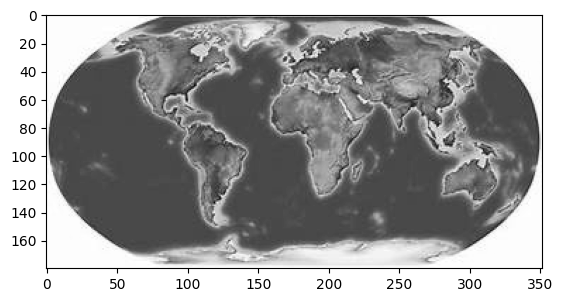

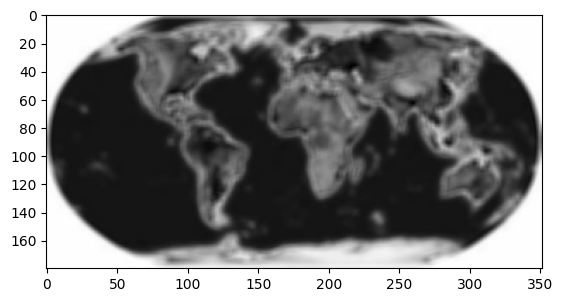

In [73]:
plt.imshow(imgst[0],cmap='gray')
plt.show()
plt.imshow(imgst[4],cmap='gray')
plt.show()

In [74]:
a,b,c = imgst.shape
a

9

0
post
125.0
-12.761227996122576
-125.0
1
post
125.0
8.55953898475398
-125.0
2
post
125.0
16.094841427038848
-125.0
3
post
125.0
-0.17755681818165459
-125.0
4
post
125.0
-7.280642534548435
-125.0
5
post
125.0
41.64036195286139
-125.0
6
post
125.0
41.41019570707015
-125.0
7
post
0.0
0.0
0.0


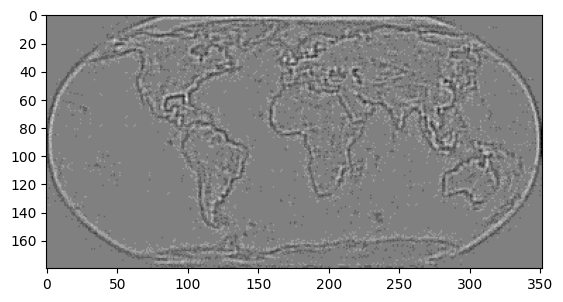

In [75]:
for i in range(a-1):
    img_nst[i] = subtract(imgst[i+1], imgst[i])
    print(i)
    # print("prev")
    # print(img_nst[i].max())
    # print(img_nst[i].mean())
    # print(img_nst[i].min())
    if ( img_nst[i].max() !=0 and img_nst[i].min() !=0 ):
        img_nst[i] = (2*(img_nst[i] -img_nst[i].min())/(img_nst[i].max() - img_nst[i].min()) -1)*125
    print("post")
    print(img_nst[i].max())
    print(img_nst[i].mean())
    print(img_nst[i].min())
    

plt.imshow(img_nst[3],cmap='gray')
plt.plot()
Z,R,C = img_nst.shape

In [55]:
a

6

In [78]:
spatial_max = np.zeros((R,C))

for i in range(R):
    for j in range(C):
        spatial_max[i][j] = -1

spatial_min = np.zeros((R,C))

for i in range(R):
    for j in range(C):
        spatial_min[i][j] = -1

count_max =np.zeros((8))
count_min =np.zeros((8))

max_co_x = []
max_co_y =[]
min_co_x = []
min_co_y = []

for i in range(1,R-1):
    
    for j in range(1,C-1):
        
        a = img_nst[:,i-1:i+2, j-1:j+2]

        if (np.max(a) >= 125 * 0.5):
        # if (np.max(a) == np.max(a)):
            
            x = np.argwhere(a >= 125 * 0.5)
            # x = np.argwhere(a == np.max(a))
            
            for z in range(8):
                if (img_nst[z,i,j] == np.max(a)):
                    spatial_max[i][j] = z
                    count_max[z] = count_max[z] +1
                    max_co_x.append(i)
                    max_co_y.append(j)
                    break

        if (np.min(a) <= -125 * 0.5):
        # if (np.min(a) == np.min(a)):
            
            x = np.argwhere(a <= -125 * 0.5)
            # x = np.argwhere(a == np.min(a))

            for z in range(8):
                if (img_nst[z,i,j] == np.min(a)):
                    spatial_min[i][j] = z
                    count_min[z] = count_min[z] +1
                    min_co_x.append(i)
                    min_co_y.append(j)
                    break

print('max')
print(spatial_max)
print('min')
print(spatial_min)

max
[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]
min
[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


In [79]:
print(count_max)
print(count_min)
print(count_min+count_max)

[   7.    2.    4.    2.   77. 1544. 1470.    0.]
[154.  13.   1.   5. 704.   0.   0.   0.]
[ 161.   15.    5.    7.  781. 1544. 1470.    0.]


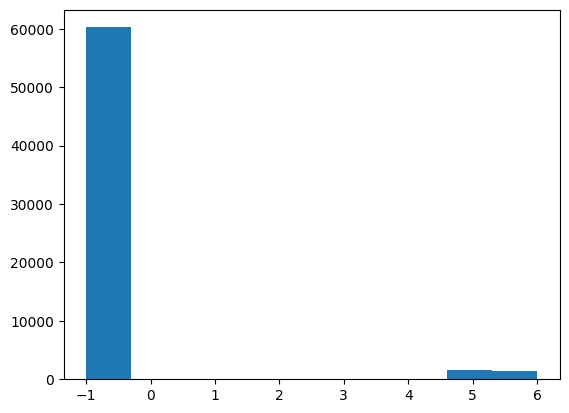

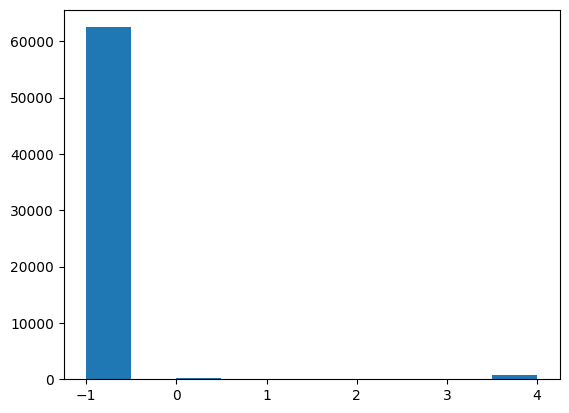

In [80]:
plt.hist(spatial_max.flatten())
plt.show()
plt.hist(spatial_min.flatten())
plt.show()

max


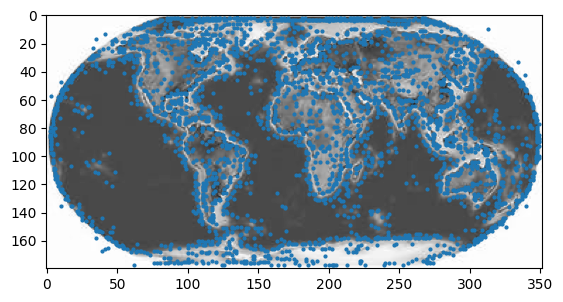

min


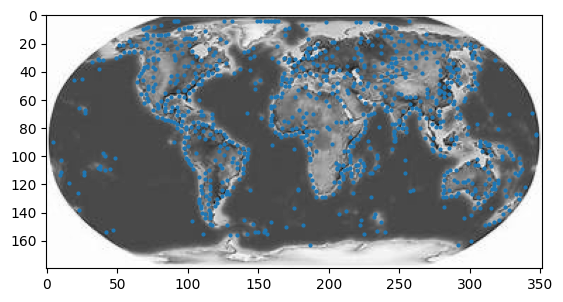

In [81]:
print('max')
plt.imshow(img1,cmap='gray')
plt.scatter(max_co_y,max_co_x,s=4)
plt.show()

print('min')
plt.imshow(img1,cmap='gray')
plt.scatter(min_co_y,min_co_x,s=4)
plt.show()

In [82]:
def edge(img):
    X =[[1 , 0, -1],[2 , 0 , -2],[1 , 0, -1]]
    X = np.array(X)

    Y = X.T
    GAUSS = np.array((
        [1/16, 2/16, 1/16],
        [2/16, 4/16, 2/16],
        [1/16, 2/16, 1/16]), dtype="float64")

    I_X = ndimage.convolve(img1,X)
    I_Y = ndimage.convolve(img1,Y)

    Ixx = np.square(I_X)
    IXX = ndimage.convolve(Ixx,GAUSS)
    Iyy = np.square(I_Y)
    IYY = ndimage.convolve(Iyy,GAUSS)

    Ixy = I_X*I_Y
    IXY = ndimage.convolve(Ixy,GAUSS)
    M = np.array([[IXX,IXY],[IXY,IYY]])

    x , y = img1.shape

    RES = np.zeros((img1.shape))
    for i in range(x):
        for j in range(y):
            mat = M[ :,:,i,j]
            if (np.linalg.det(mat)!=0):
                
                mod =np.abs(np.linalg.det(mat))
                h= ((np.trace(mat)**2) / mod)
                r = (h-2) + np.sqrt((h-2)**2 - 4)
                r = r/2
                # print(r)
                if (r<9):
                    RES[i,j]=1
                else:
                    RES[i,j]=0
                        
    Y,X =np.where(RES !=0)
    plt.imshow(img)
    plt.scatter(X,Y,s=4)
    plt.show()
    plt.hist(RES.flatten())
    plt.show()
    print(RES)
    return RES

C:\Users\maste\AppData\Local\Temp\ipykernel_53876\2686868763.py:33: RuntimeWarning: invalid value encountered in sqrt
  r = (h-2) + np.sqrt((h-2)**2 - 4)


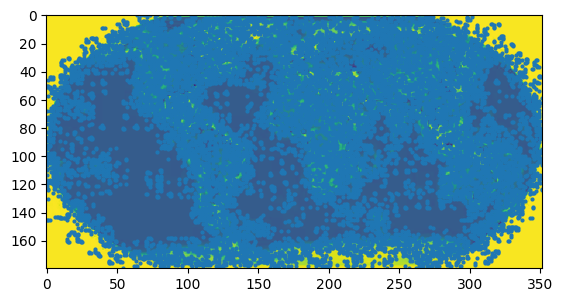

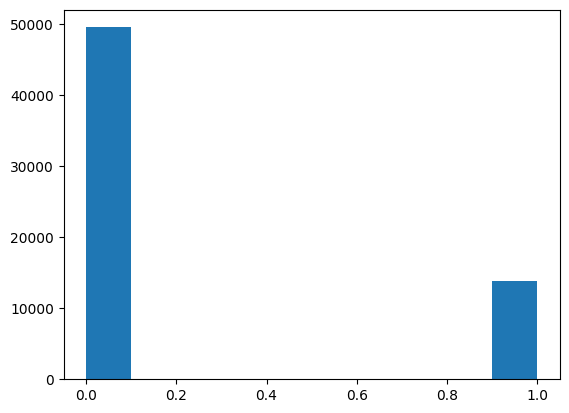

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [83]:
RES = edge(img1)

In [84]:
print(spatial_max.shape)
print(RES.shape)

(180, 352)
(180, 352)


In [85]:
x,y = img1.shape
for i in range(x):
    for j in range(y):
        if (RES[i,j]!=1):
            # z1 = spatial_min[i,j]
            # z2 = spatial_max[i,j]
            # if (z1 !=-1):
            #     count_min[z1] =count_min[z1]-1
            # if (z2 !=-1):
            #     count_max[z2] =count_max[z2]-1
            # # print(z1)
            spatial_max[i,j] = -1
            spatial_min[i,j] = -1
            


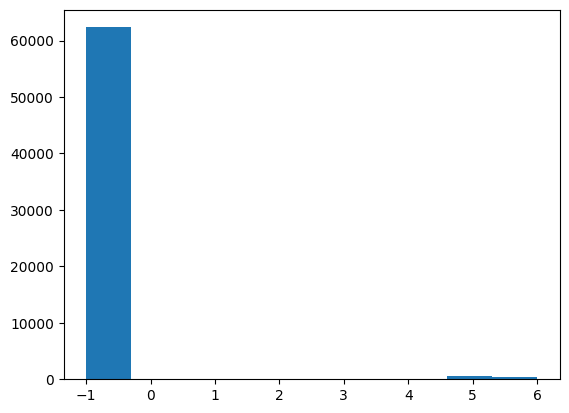

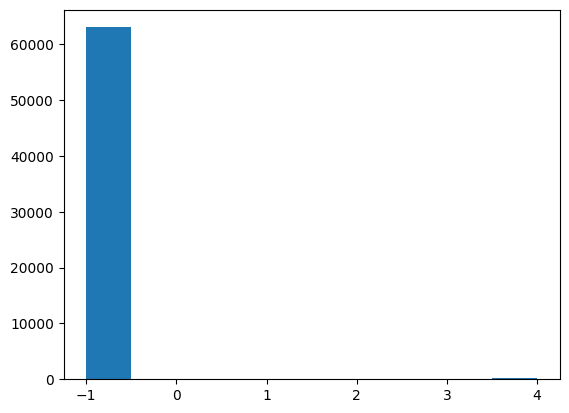

In [86]:
plt.hist(spatial_max.flatten())
plt.show()
plt.hist(spatial_min.flatten())
plt.show()

In [87]:
cor_x = []
cor_y = []
count =0
spatial = np.zeros((img1.shape))

for i in range(x):
    for j in range (y):
        if (spatial_max[i,j] !=-1):
            cor_x.append(i)
            cor_y.append(j)
            count = count+1
            spatial[i][j] = spatial_max[i,j]
        if (spatial_min[i,j] !=-1):
            cor_x.append(i)
            cor_y.append(j)
            count = count+1
            spatial[i][j] = spatial_min[i,j] 
        else:
            spatial[i][j] = -1

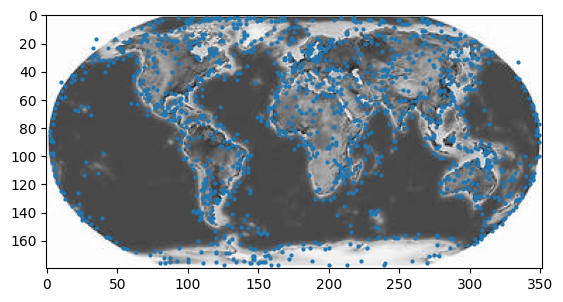

1318


In [88]:
plt.imshow(img1,cmap='gray')
plt.scatter(cor_y,cor_x,s=4)
plt.show()
print(count)

In [70]:
img.shape

(180, 352, 3)

In [89]:
k=2
G = np.zeros((x,y,16,16))
theta = np.zeros((x,y,16,16))
def orientation(spatial,img1):
    x,y = img1.shape
    kY = [[-1,0,1]]
    kY = np.array(kY)
    kX =kY.T
    
    
    for i in range(8,x-8):
        for j in range(8,y-8):
            if (spatial[i][j] !=-1):
                I = img1[i-8:i+8,j-8:j+8]
                sig = spatial[i][j]
                if (sig>0):
                    I_c = cv.GaussianBlur(I,(3,3),k**sig)
                elif (sig==0):
                    I_c = I
                
                IX = ndimage.convolve(I_c,kX)
                IY = ndimage.convolve(I_c,kY) 
                G[i][j] = np.hypot(IX, IY)
                # print(i,j)
                theta[i][j] = np.arctan2(IX, IY)
            
    return G,theta

In [90]:
mag,theta = orientation(spatial,img1)
x,y = img1.shape
theta = theta *180/np.pi
print(x)

180


8 76


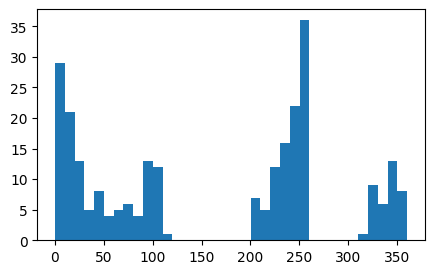

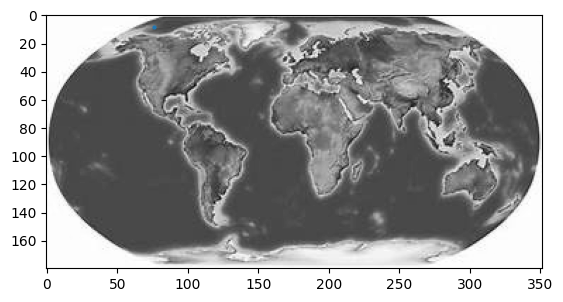

8 246


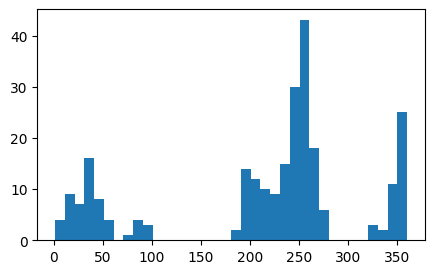

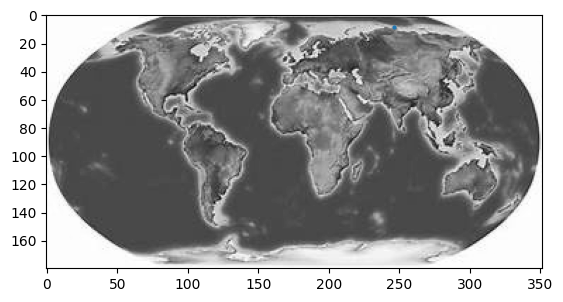

9 97


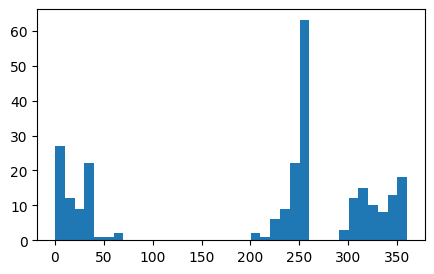

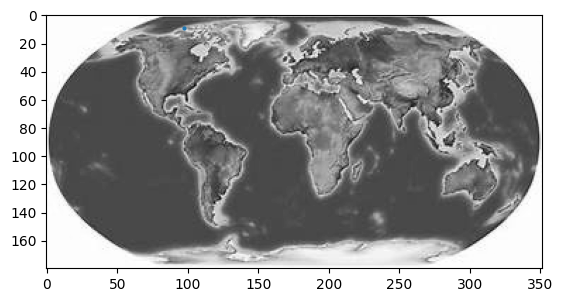

9 172


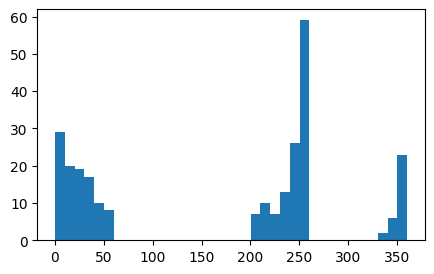

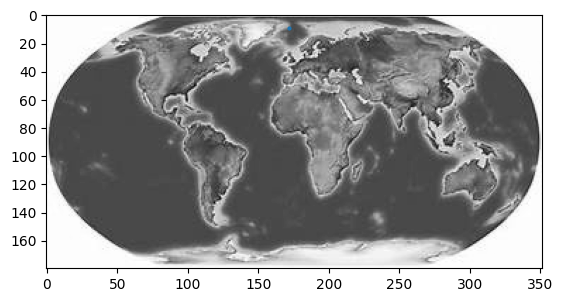

10 94


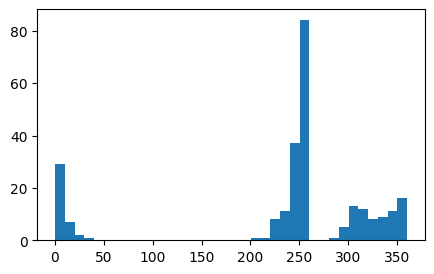

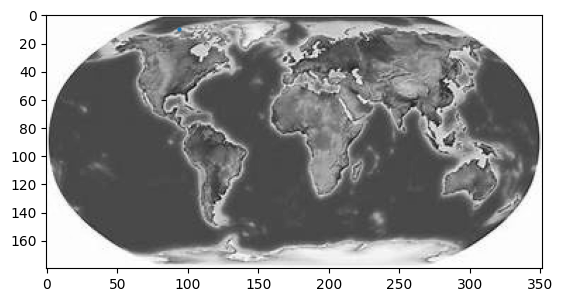

10 184


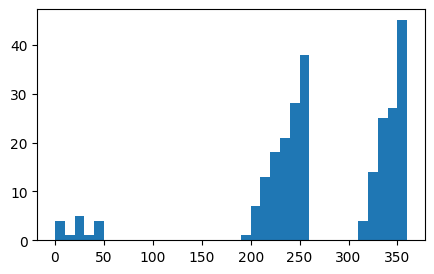

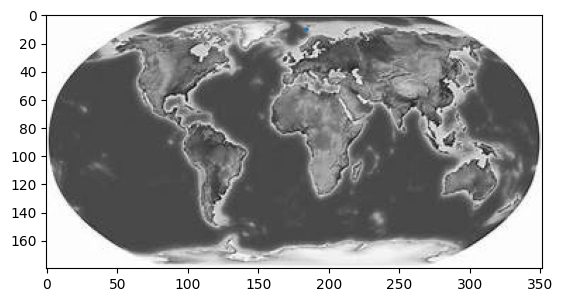

13 70


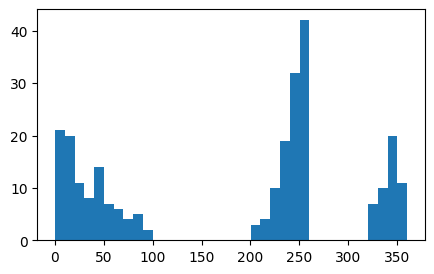

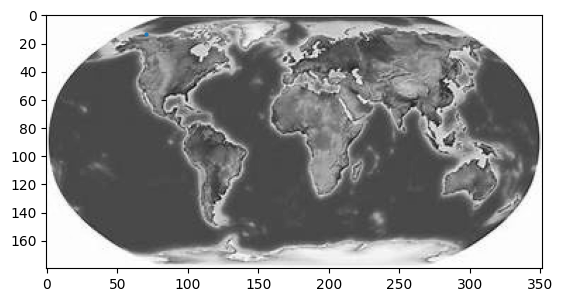

14 79


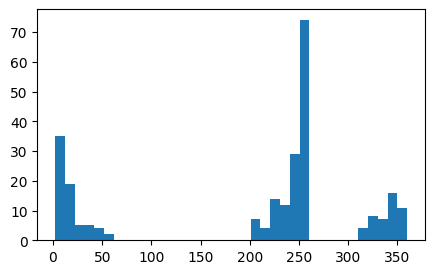

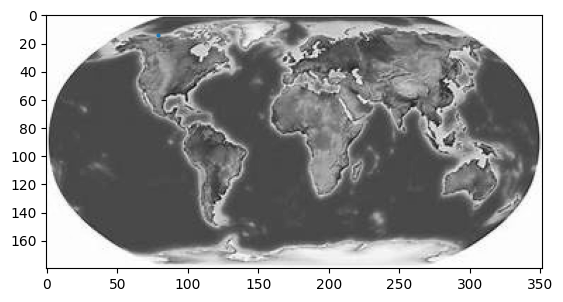

14 84


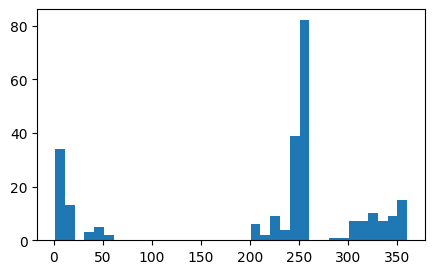

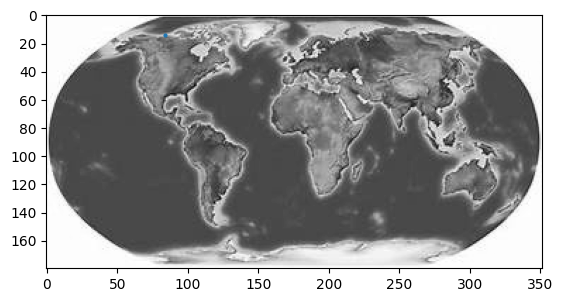

14 234


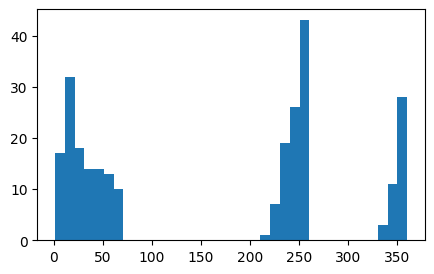

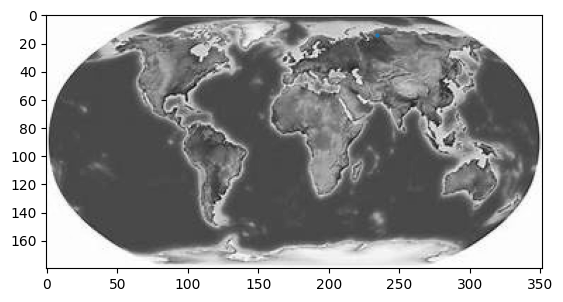

15 239


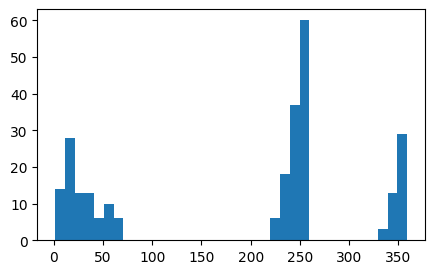

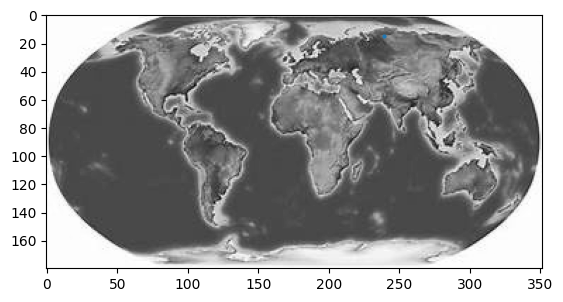

16 244


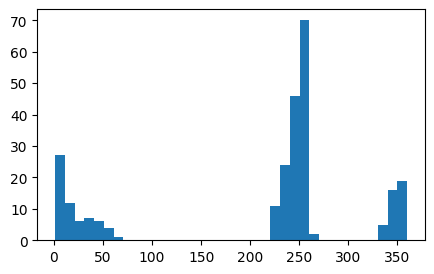

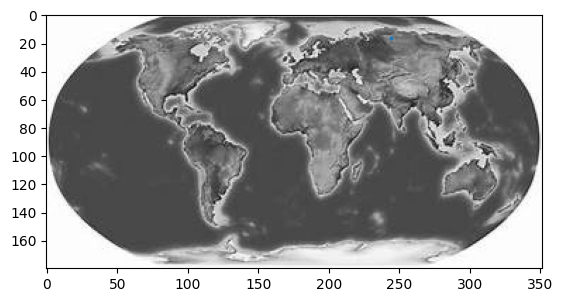

17 68


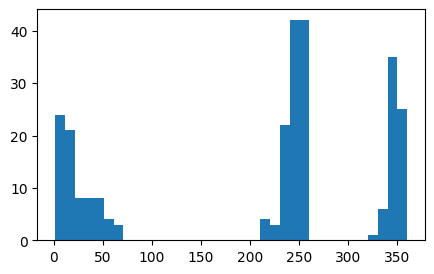

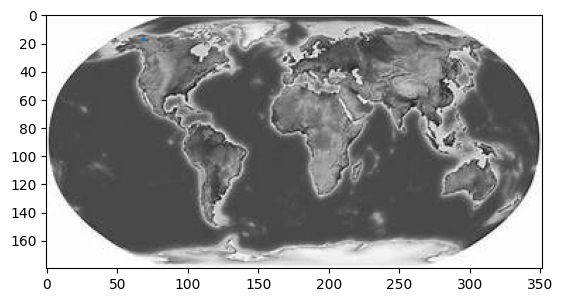

17 97


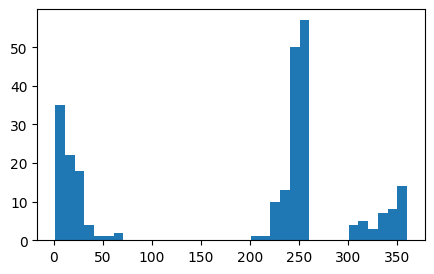

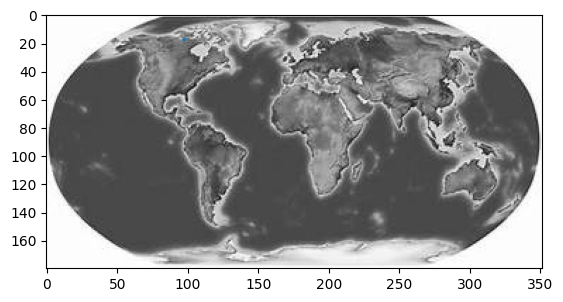

18 58


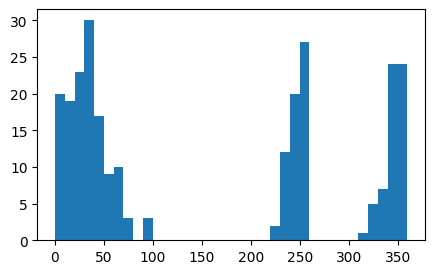

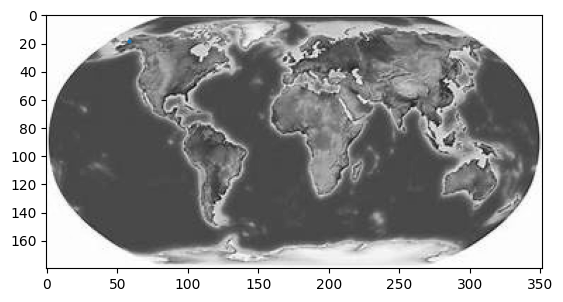

18 250


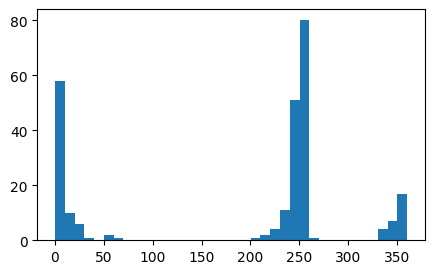

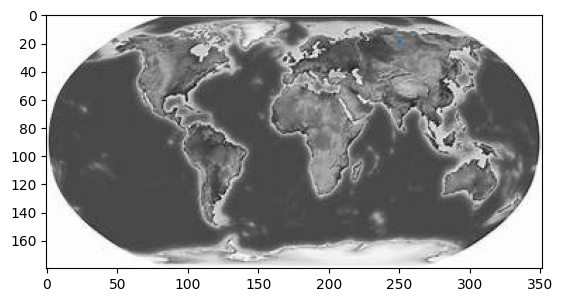

19 91


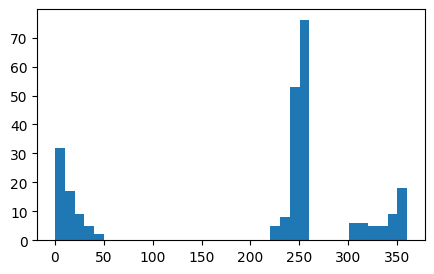

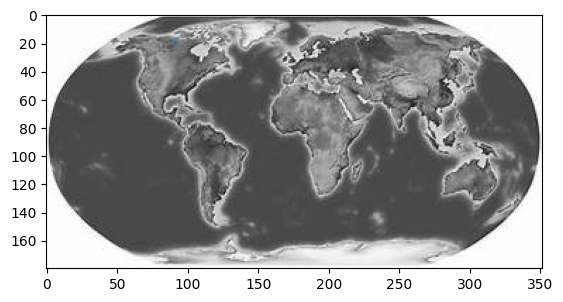

19 202


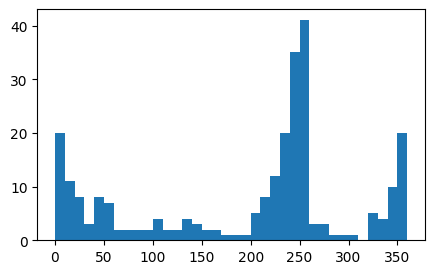

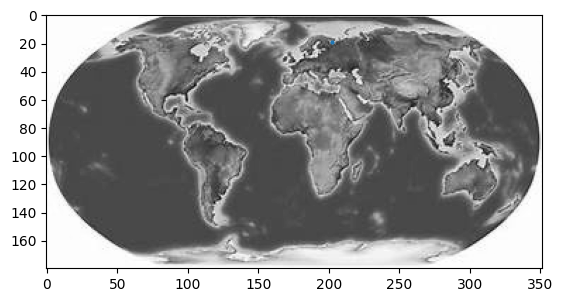

19 268


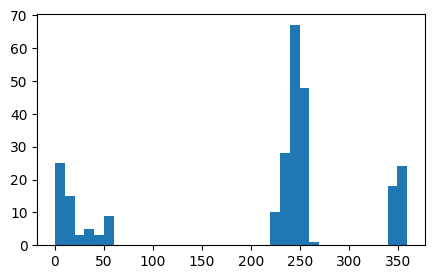

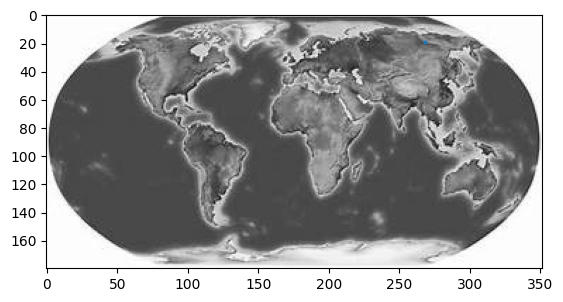

19 282


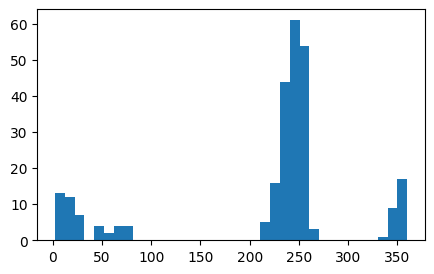

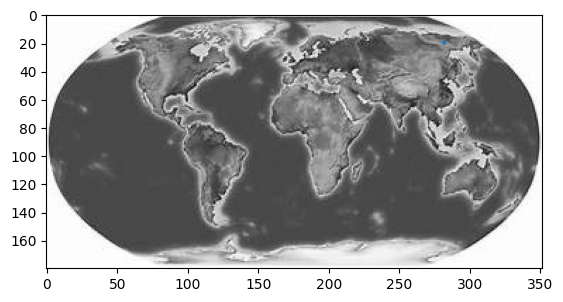

20 78


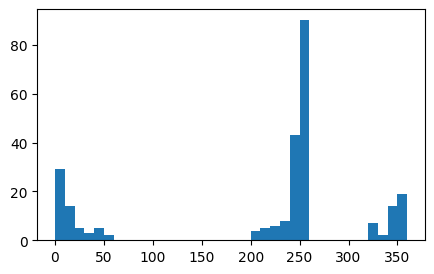

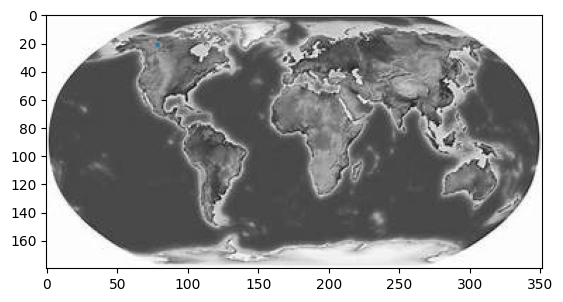

20 80


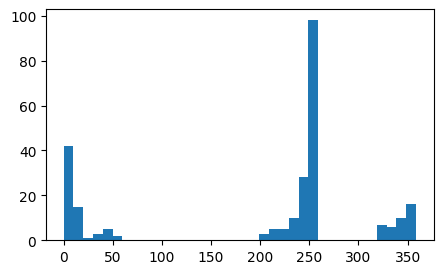

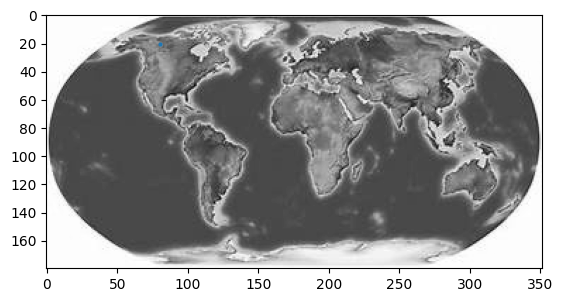

20 297


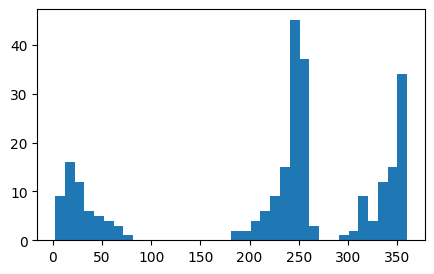

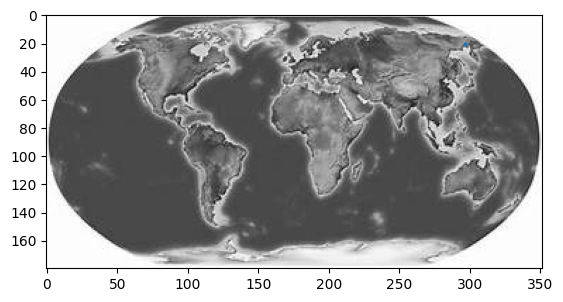

21 101


KeyboardInterrupt: 

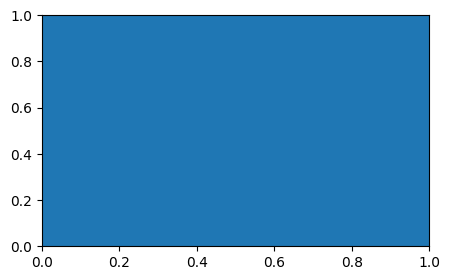

In [91]:
for (i,j) in (np.argwhere(spatial!=-1)):
    if (i>=8 and i <= x-8 and j>=8 and j<=y-8):
        # if (i>x-50):
        print(i,j)
        fig, ax = plt.subplots(figsize =(5, 3))
        ax.hist(G[i][j].flatten(), bins = 36)
        plt.show()
        plt.imshow(img1,cmap='gray')
        plt.scatter(j,i,s=4)
        plt.show()
    

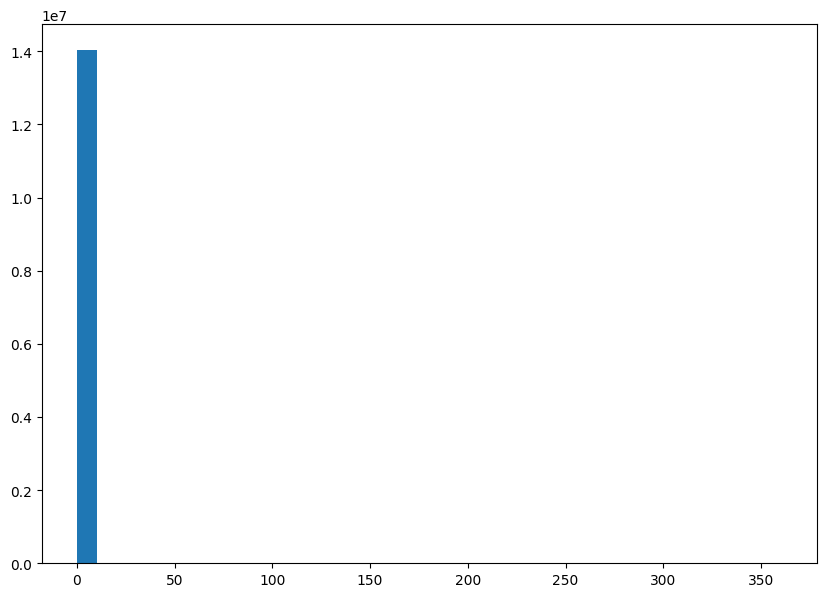

In [25]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(G[8:x-8,8:y-8,:,:].flatten(), bins = 36)
# Show plot
plt.show()